In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("../DataSet/GlobalSuperstoreLite.csv")
print(df)

            Order ID  Order Date Customer ID        Country        Product ID  \
0     CA-2012-124891   7/31/2012    RH-19495  United States   TEC-AC-10003033   
1      IN-2013-77878    2/5/2013    JR-16210      Australia   FUR-CH-10003950   
2      IN-2013-71249  10/17/2013    CR-12730      Australia   TEC-PH-10004664   
3    ES-2013-1579342   1/28/2013    KM-16375        Germany   TEC-PH-10004583   
4       SG-2013-4320   11/5/2013     RH-9495        Senegal  TEC-SHA-10000501   
..               ...         ...         ...            ...               ...   
994     SY-2012-8920   9/24/2012    SV-10815          Syria  TEC-CIS-10001717   
995    IN-2014-48625    4/1/2014    JF-15415          China   FUR-TA-10001633   
996   US-2013-113649   8/10/2013    HA-14920  United States   OFF-AP-10002518   
997    IN-2013-85662  10/17/2013    CK-12595    New Zealand   TEC-CO-10003226   
998   MX-2013-152996   1/19/2013    SS-20140         Brazil   FUR-BO-10002766   

            Category Sub-Ca

In [3]:
duplicate_rows = df[df.duplicated()]

In [4]:
print("Duplicate rows in the dataset:")
print(duplicate_rows)

Duplicate rows in the dataset:
Empty DataFrame
Columns: [Order ID, Order Date, Customer ID, Country, Product ID, Category, Sub-Category, Sales, Quantity, Discount, Profit, Shipping Cost]
Index: []


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Get rows with missing values
rows_with_missing = df[df.isnull().any(axis=1)]

# Get columns with missing values
columns_with_missing = df.columns[df.isnull().any()].tolist()

print("Missing values per column:")
print(missing_values)

print("\nRows with missing values:")
print(rows_with_missing)

print("\nColumns with missing values:")
print(columns_with_missing)

Missing values per column:
Order ID         0
Order Date       0
Customer ID      0
Country          0
Product ID       0
Category         0
Sub-Category     0
Sales            0
Quantity         0
Discount         0
Profit           0
Shipping Cost    0
dtype: int64

Rows with missing values:
Empty DataFrame
Columns: [Order ID, Order Date, Customer ID, Country, Product ID, Category, Sub-Category, Sales, Quantity, Discount, Profit, Shipping Cost]
Index: []

Columns with missing values:
[]


In [6]:
from mlxtend.frequent_patterns import apriori
df = pd.read_csv('../DataSet/GlobalSuperstoreLite.csv')

# For market basket analysis, we are interested in the 'Order ID' and 'Product ID' columns
basket = df.groupby(['Order ID', 'Sub-Category']).size().unstack().fillna(0)

# Convert the counts into boolean values (True if product was purchased, False otherwise)
basket = basket.applymap(lambda x: True if x > 0 else False)

# Step 3: Apply Apriori algorithm
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)


# Display the frequent item sets
print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
    support       itemsets
0  0.034591  (Accessories)
1  0.139413   (Appliances)
2  0.023061      (Binders)
3  0.140461    (Bookcases)
4  0.119497       (Chairs)
5  0.156184      (Copiers)
6  0.077568     (Machines)
7  0.196017       (Phones)
8  0.037736      (Storage)
9  0.106918       (Tables)


In [8]:
import pandas as pd
from itertools import combinations

# Load your dataset into a pandas DataFrame
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('../DataSet/GlobalSuperstoreLite.csv')

# Assuming 'Order ID' is a unique identifier for each order
# Group the DataFrame by 'Order ID' and aggregate the 'Product ID' into lists
grouped_df = df.groupby('Order ID')['Sub-Category'].apply(list)

# Generate all possible combinations of 2 products for each order
item_combinations = [comb for products in grouped_df for comb in combinations(products, 2)]

# Print the item combinations
print("Item combinations:")
for combination in item_combinations:
    print(combination)

Item combinations:
('Accessories', 'Tables')
('Tables', 'Chairs')
('Accessories', 'Machines')
('Storage', 'Chairs')
('Accessories', 'Chairs')
('Machines', 'Accessories')
('Appliances', 'Accessories')
('Phones', 'Machines')
('Phones', 'Appliances')
('Bookcases', 'Supplies')
('Phones', 'Phones')
('Copiers', 'Phones')
('Accessories', 'Chairs')
('Bookcases', 'Copiers')
('Appliances', 'Copiers')
('Appliances', 'Copiers')
('Copiers', 'Copiers')
('Storage', 'Copiers')
('Tables', 'Bookcases')
('Tables', 'Tables')
('Tables', 'Chairs')
('Bookcases', 'Tables')
('Bookcases', 'Chairs')
('Tables', 'Chairs')
('Appliances', 'Chairs')
('Bookcases', 'Copiers')
('Copiers', 'Bookcases')
('Tables', 'Phones')
('Bookcases', 'Bookcases')
('Copiers', 'Machines')
('Copiers', 'Chairs')
('Bookcases', 'Copiers')
('Machines', 'Chairs')
('Phones', 'Appliances')
('Chairs', 'Copiers')
('Bookcases', 'Bookcases')
('Storage', 'Copiers')
('Machines', 'Phones')
('Chairs', 'Phones')
('Phones', 'Machines')
('Appliances', 'Ph

In [9]:
# Assuming 'item_combinations' contains the list of all combinations

# Initialize an empty dictionary to store combination counts
combination_counts = {}

# Count the occurrences of each combination
for combination in item_combinations:
    if combination in combination_counts:
        combination_counts[combination] += 1
    else:
        combination_counts[combination] = 1

# Print the counts of combinations
print("Combination Counts:")
for combination, count in combination_counts.items():
    print(f"{combination}: {count} times")

Combination Counts:
('Accessories', 'Tables'): 1 times
('Tables', 'Chairs'): 3 times
('Accessories', 'Machines'): 1 times
('Storage', 'Chairs'): 1 times
('Accessories', 'Chairs'): 2 times
('Machines', 'Accessories'): 1 times
('Appliances', 'Accessories'): 1 times
('Phones', 'Machines'): 3 times
('Phones', 'Appliances'): 3 times
('Bookcases', 'Supplies'): 1 times
('Phones', 'Phones'): 3 times
('Copiers', 'Phones'): 1 times
('Bookcases', 'Copiers'): 3 times
('Appliances', 'Copiers'): 2 times
('Copiers', 'Copiers'): 1 times
('Storage', 'Copiers'): 2 times
('Tables', 'Bookcases'): 1 times
('Tables', 'Tables'): 1 times
('Bookcases', 'Tables'): 1 times
('Bookcases', 'Chairs'): 1 times
('Appliances', 'Chairs'): 1 times
('Copiers', 'Bookcases'): 1 times
('Tables', 'Phones'): 1 times
('Bookcases', 'Bookcases'): 2 times
('Copiers', 'Machines'): 1 times
('Copiers', 'Chairs'): 1 times
('Machines', 'Chairs'): 1 times
('Chairs', 'Copiers'): 1 times
('Machines', 'Phones'): 1 times
('Chairs', 'Phones'

In [10]:
# Assuming 'combination_counts' contains the dictionary of combination counts

# Sort the dictionary by count of occurrences in descending order
sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent combinations along with their counts
print("Most frequent combinations:")
for combination, count in sorted_combinations[:10]:  # Change 10 to the desired number of top combinations
    print(f"{combination}: {count} times")

Most frequent combinations:
('Tables', 'Chairs'): 3 times
('Phones', 'Machines'): 3 times
('Phones', 'Appliances'): 3 times
('Phones', 'Phones'): 3 times
('Bookcases', 'Copiers'): 3 times
('Accessories', 'Chairs'): 2 times
('Appliances', 'Copiers'): 2 times
('Storage', 'Copiers'): 2 times
('Bookcases', 'Bookcases'): 2 times
('Phones', 'Bookcases'): 2 times


In [12]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Assuming 'combination_counts' contains the dictionary of combination counts

# Convert combination counts to transactional format
transaction_df = pd.DataFrame(list(combination_counts.keys()), columns=['item_1', 'item_2'])
transaction_df['count'] = list(combination_counts.values())
transaction_df = transaction_df.pivot(index='item_1', columns='item_2', values='count').fillna(0)

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules


#convert the item combinations to a data frame
item_combinations_df = pd.DataFrame(item_combinations, columns =['item_1','item_2'])

# Apply one-hot encoding to the item combinations DataFrame
item_combinations_encoded = pd.get_dummies(item_combinations_df)

# Apply Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(item_combinations_encoded, min_support=0.01, use_colnames=True)

# Generate association rules
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=3.0)

# Print the association rules
print("Association Rules:")
print(association_rules_df)

association_rules_df

Association Rules:
             antecedents           consequents  antecedent support  \
0   (item_1_Accessories)       (item_2_Tables)                0.08   
1        (item_2_Tables)  (item_1_Accessories)                0.06   
2   (item_2_Accessories)   (item_1_Appliances)                0.04   
3    (item_1_Appliances)  (item_2_Accessories)                0.12   
4      (item_2_Supplies)    (item_1_Bookcases)                0.02   
5     (item_1_Bookcases)     (item_2_Supplies)                0.16   
6        (item_1_Chairs)       (item_2_Phones)                0.04   
7        (item_2_Phones)       (item_1_Chairs)                0.16   
8      (item_1_Machines)  (item_2_Accessories)                0.08   
9   (item_2_Accessories)     (item_1_Machines)                0.04   
10   (item_2_Appliances)       (item_1_Phones)                0.06   
11       (item_1_Phones)   (item_2_Appliances)                0.24   
12      (item_1_Storage)      (item_2_Copiers)                0.06   
1

C:\Users\savan\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(item_1_Accessories),(item_2_Tables),0.08,0.06,0.02,0.250000,4.166667,0.0152,1.253333,0.826087
1,(item_2_Tables),(item_1_Accessories),0.06,0.08,0.02,0.333333,4.166667,0.0152,1.380000,0.808511
2,(item_2_Accessories),(item_1_Appliances),0.04,0.12,0.02,0.500000,4.166667,0.0152,1.760000,0.791667
3,(item_1_Appliances),(item_2_Accessories),0.12,0.04,0.02,0.166667,4.166667,0.0152,1.152000,0.863636
4,(item_2_Supplies),(item_1_Bookcases),0.02,0.16,0.02,1.000000,6.250000,0.0168,inf,0.857143
5,(item_1_Bookcases),(item_2_Supplies),0.16,0.02,0.02,0.125000,6.250000,0.0168,1.120000,1.000000
6,(item_1_Chairs),(item_2_Phones),0.04,0.16,0.02,0.500000,3.125000,0.0136,1.680000,0.708333
7,(item_2_Phones),(item_1_Chairs),0.16,0.04,0.02,0.125000,3.125000,0.0136,1.097143,0.809524
8,(item_1_Machines),(item_2_Accessories),0.08,0.04,0.02,0.250000,6.250000,0.0168,1.280000,0.913043
9,(item_2_Accessories),(item_1_Machines),0.04,0.08,0.02,0.500000,6.250000,0.0168,1.840000,0.875000


In [17]:
import pandas as pd

# Load the sales data from the CSV file
sales = pd.read_csv('GlobalSuperstoreLite.csv')

# Concatenate the DataFrames along rows
association_sales_data = pd.concat([association_rules_df, sales], axis=1)

print(association_sales_data)

              antecedents           consequents  antecedent support  \
0    (item_1_Accessories)       (item_2_Tables)                0.08   
1         (item_2_Tables)  (item_1_Accessories)                0.06   
2    (item_2_Accessories)   (item_1_Appliances)                0.04   
3     (item_1_Appliances)  (item_2_Accessories)                0.12   
4       (item_2_Supplies)    (item_1_Bookcases)                0.02   
..                    ...                   ...                 ...   
994                   NaN                   NaN                 NaN   
995                   NaN                   NaN                 NaN   
996                   NaN                   NaN                 NaN   
997                   NaN                   NaN                 NaN   
998                   NaN                   NaN                 NaN   

     consequent support  support  confidence      lift  leverage  conviction  \
0                  0.06     0.02    0.250000  4.166667    0.0152   

In [18]:
# Select the columns you want to keep
selected_columns = ['antecedents','consequents','antecedent support','consequent support','support','confidence','lift','leverage','conviction','zhangs_metric','Sales']  # Replace 'col1', 'col2', 'col3' with the actual column names you want to keep

# Create a new DataFrame with only the selected columns
selected_data = association_sales_data[selected_columns].copy()

# Print the new DataFrame
print(selected_data)

              antecedents           consequents  antecedent support  \
0    (item_1_Accessories)       (item_2_Tables)                0.08   
1         (item_2_Tables)  (item_1_Accessories)                0.06   
2    (item_2_Accessories)   (item_1_Appliances)                0.04   
3     (item_1_Appliances)  (item_2_Accessories)                0.12   
4       (item_2_Supplies)    (item_1_Bookcases)                0.02   
..                    ...                   ...                 ...   
994                   NaN                   NaN                 NaN   
995                   NaN                   NaN                 NaN   
996                   NaN                   NaN                 NaN   
997                   NaN                   NaN                 NaN   
998                   NaN                   NaN                 NaN   

     consequent support  support  confidence      lift  leverage  conviction  \
0                  0.06     0.02    0.250000  4.166667    0.0152   

In [22]:
# Calculate the impact on sales
association_sales_data['impact_on_sales'] = association_sales_data['lift'] * association_sales_data['Sales']

# Summarize the impact of association rules
association_sales_summary = association_sales_data.groupby(['antecedents', 'consequents']).agg({
    'support': 'mean',
    'confidence': 'mean',
    'Sales': 'sum',  # Use 'Sales' directly instead of 'Sales_antecedent'
    'impact_on_sales': 'sum'
}).reset_index()

# Assess the significance of association rules in driving sales
# You can further analyze and interpret the association_sales_summary DataFrame
# Display the summary
print(association_sales_summary)

             antecedents           consequents  support  confidence     Sales  \
0   (item_1_Accessories)       (item_2_Tables)     0.02    0.250000  2309.650   
1        (item_2_Tables)  (item_1_Accessories)     0.02    0.333333  3709.395   
2   (item_2_Accessories)   (item_1_Appliances)     0.02    0.500000  5175.171   
3   (item_2_Accessories)     (item_1_Machines)     0.02    0.500000  4297.644   
4    (item_1_Appliances)  (item_2_Accessories)     0.02    0.166667  2892.510   
5      (item_2_Supplies)    (item_1_Bookcases)     0.02    1.000000  2832.960   
6     (item_1_Bookcases)     (item_2_Supplies)     0.02    0.125000  2862.675   
7        (item_1_Chairs)       (item_2_Phones)     0.02    0.500000  1822.080   
8        (item_2_Phones)       (item_1_Chairs)     0.02    0.125000  5244.840   
9      (item_1_Machines)  (item_2_Accessories)     0.02    0.250000  5083.960   
10   (item_2_Appliances)       (item_1_Phones)     0.06    1.000000  4164.050   
11       (item_1_Phones)   (

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming association_sales_summary contains columns like 'antecedents', 'consequents', 'support', 'confidence', 'Sales', 'impact_on_sales'

# For the sake of demonstration, let's consider 'support', 'confidence', and 'impact_on_sales' as features for our model
X = association_sales_summary[['support', 'confidence', 'impact_on_sales']]
# Target variable: total sales
y = association_sales_summary['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 339524.08573209244


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize models
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Fit models
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_gb = gradient_boosting.predict(X_test)

# Evaluate models
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Decision Tree Mean Squared Error:", mse_dt)
print("Random Forest Mean Squared Error:", mse_rf)
print("Gradient Boosting Mean Squared Error:", mse_gb)

Decision Tree Mean Squared Error: 1274192.121193666
Random Forest Mean Squared Error: 856793.0146196359
Gradient Boosting Mean Squared Error: 1329513.0658935653


In [26]:
import matplotlib.pyplot as plt
import networkx as nx

# Identify top rules based on lift
top_rules_lift = association_rules_df.nlargest(5, 'lift')

# Print the top rules based on lift
print("Top Rules based on Lift:")
print(top_rules_lift)



Top Rules based on Lift:
            antecedents           consequents  antecedent support  \
4     (item_2_Supplies)    (item_1_Bookcases)                0.02   
5    (item_1_Bookcases)     (item_2_Supplies)                0.16   
8     (item_1_Machines)  (item_2_Accessories)                0.08   
9  (item_2_Accessories)     (item_1_Machines)                0.04   
0  (item_1_Accessories)       (item_2_Tables)                0.08   

   consequent support  support  confidence      lift  leverage  conviction  \
4                0.16     0.02       1.000  6.250000    0.0168         inf   
5                0.02     0.02       0.125  6.250000    0.0168    1.120000   
8                0.04     0.02       0.250  6.250000    0.0168    1.280000   
9                0.08     0.02       0.500  6.250000    0.0168    1.840000   
0                0.06     0.02       0.250  4.166667    0.0152    1.253333   

   zhangs_metric  
4       0.857143  
5       1.000000  
8       0.913043  
9       0.87500

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\ProgramData\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


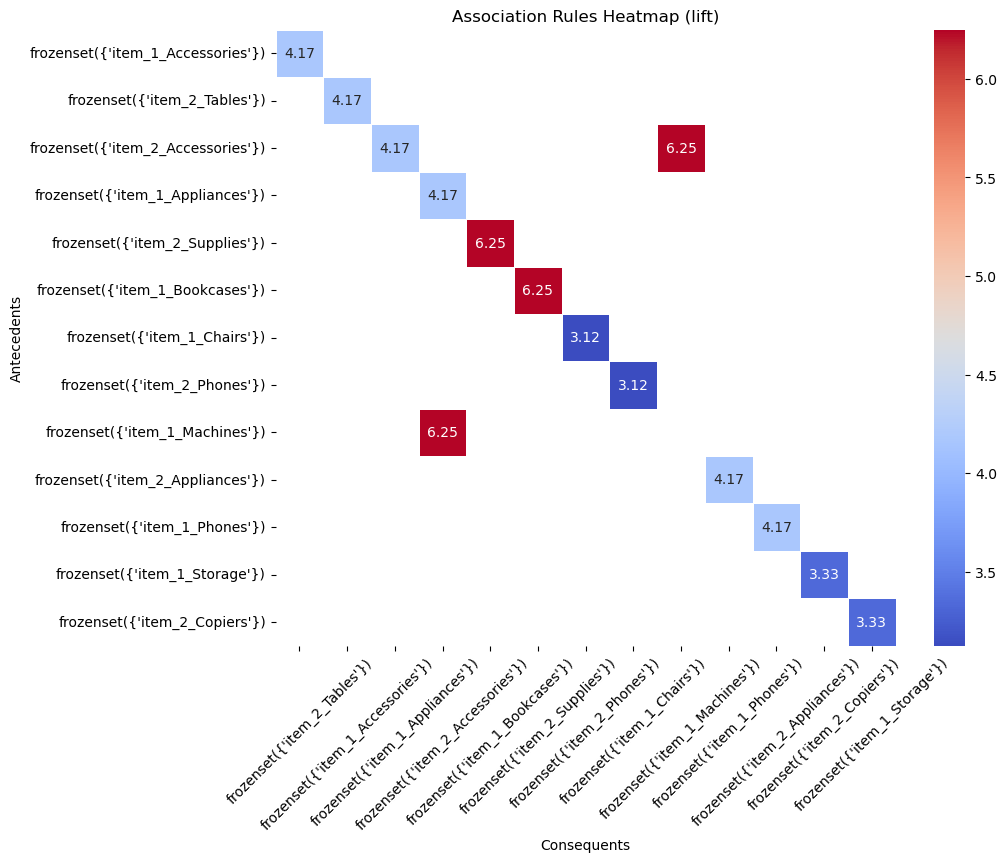

In [27]:
import seaborn as sns

# Reshape association rules data to create a matrix
rule_matrix = association_rules_df.pivot(index='antecedents', columns='consequents', values='lift')

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rule_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Association Rules Heatmap (lift)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


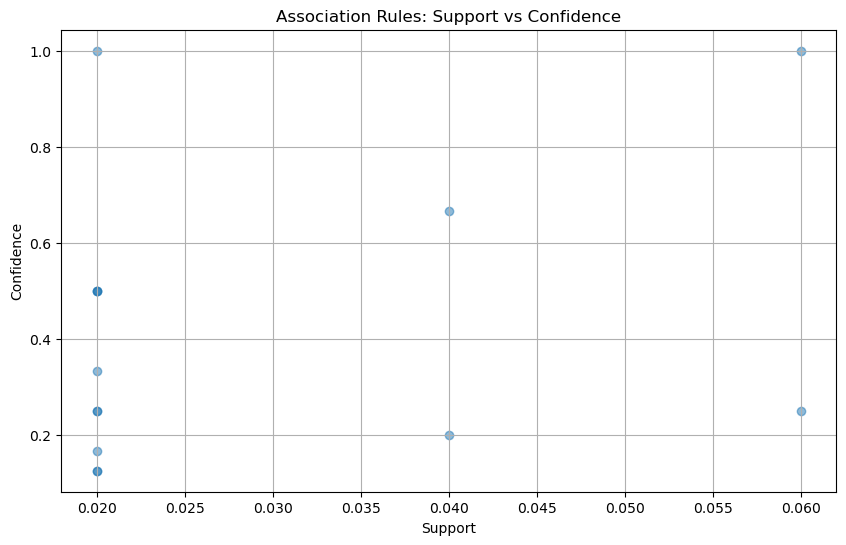

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(association_rules_df['support'], association_rules_df['confidence'], alpha=0.5)
plt.title('Association Rules: Support vs Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

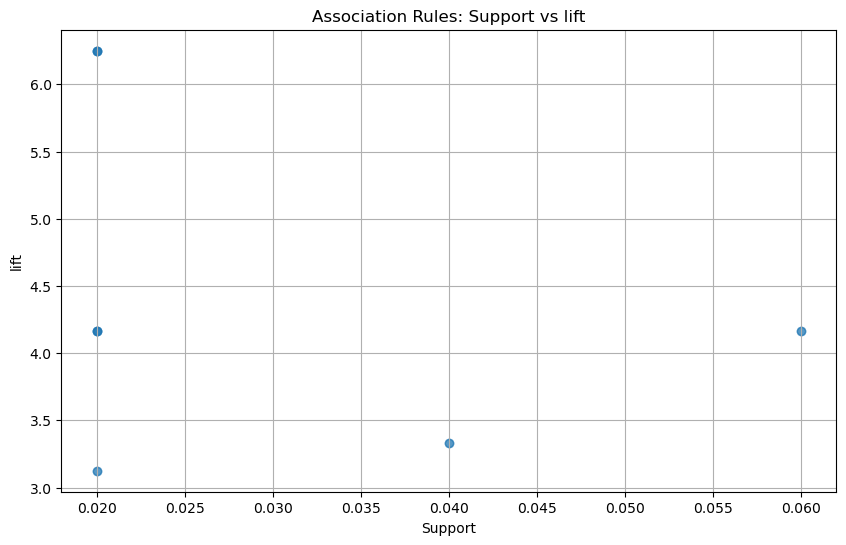

In [29]:
import matplotlib.pyplot as plt

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
plt.scatter(association_rules_df['support'], association_rules_df['lift'], alpha=0.5)
plt.title('Association Rules: Support vs lift')
plt.xlabel('Support')
plt.ylabel('lift')
plt.grid(True)
plt.show()